In [1]:
include("./Eigensolvers.jl")
using EigenSolvers
using PyPlot
srand(0);

In [2]:
d = 10
Lambda = ones(d)
Lambda[2:end] = 0.9

n = 10^6
A = randn(n,d)
Q,_ = qr(A)
A = randn(d,d)
U,_ = qr(A)
data = sqrt(n)*Q*diagm(sqrt(Lambda))*U'
A = data'*data/n
u1 = U[:,1];

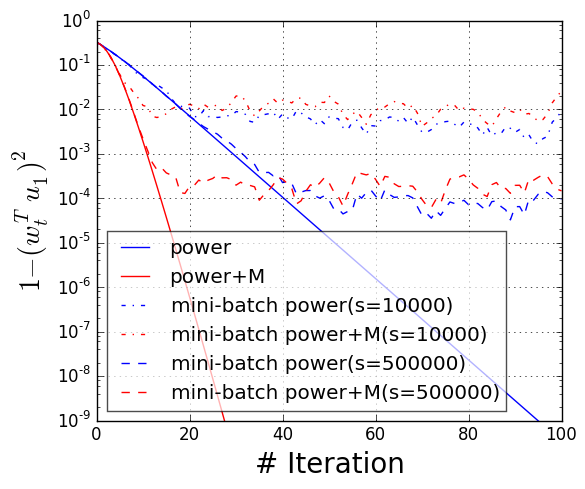

In [3]:
n,d = size(data)
w0 = randn(d)
w0 = w0/norm(w0)
x0 = w0
epoch = 100
beta = Lambda[2]^2/4
eig_gap = Lambda[1] - Lambda[2]

figure(figsize=(6,5))
res_pw = power(A, x0, 0, epoch, u1)
semilogy(res_pw, "b-",label="power")
res_mpw = power(A, x0, beta, epoch, u1)
semilogy(res_mpw, "r-",label="power+M")

num_trials = 1
for s = [10000]
    res_sgd = zeros(epoch+1, num_trials)
    for i = 1:num_trials
        res_sgd[:,i] = minibatch_sgd_m(data, x0,  0, epoch, u1, s,i)
    end
    semilogy(mean(res_sgd,2), label=@sprintf("mini-batch power(s=%d)", s),"b-.",)
    res_msgd = zeros(epoch+1, num_trials)
    for i = 1:num_trials
        res_msgd[:,i] = minibatch_sgd_m(data, x0, beta, epoch, u1, s,i)
    end
    semilogy(mean(res_msgd,2), label=@sprintf("mini-batch power+M(s=%d)", s),"r-.",)
end


for s = [500000]
    res_sgd = zeros(epoch+1, num_trials)
    for i = 1:num_trials
        res_sgd[:,i] = minibatch_sgd_m(data, x0, 0,  epoch, u1, s,i)
    end
    semilogy(mean(res_sgd ,2), label=@sprintf("mini-batch power(s=%d)", s),"b--",)
    res_msgd = zeros(epoch+1, num_trials)
    for i = 1:num_trials
        res_msgd[:,i] = minibatch_sgd_m(data, x0, beta, epoch, u1, s,i)
    end
    semilogy(mean(res_msgd,2), label=@sprintf("mini-batch power+M(s=%d)", s),"r--",)
end
legend(loc="best",framealpha=0.7)
xlabel("# Iteration", fontsize=20)
ylabel(L"$1 - (w_t^Tu_1)^2$", fontsize=20)
ylim([1e-9,1])
grid("on")
savefig("mini_power.pdf", bbox_inches="tight")

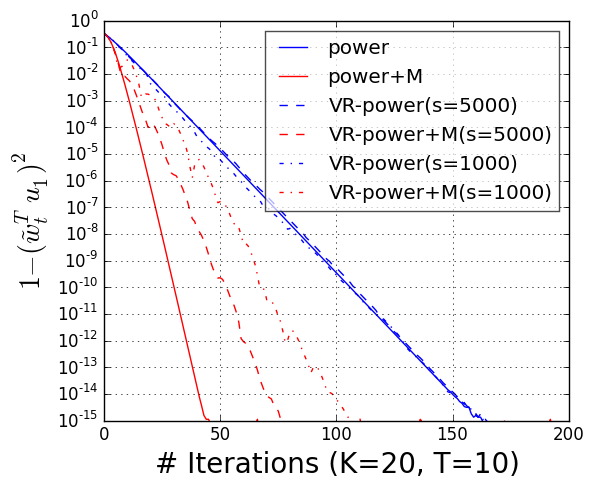

In [4]:
epoch = 200
figure(figsize=(6,5))
res_pw = power(A, x0, 0, epoch, u1)
semilogy(res_pw, "b-",label="power")
res_mpw = power(A, x0, beta, epoch, u1)
semilogy(res_mpw, "r-",label="power+M")

epoch = 20
m = 10
num_trials = 1
for s = [5000]
    res_sgd = zeros(epoch*m + 1, num_trials)
    res_msgd = zeros(epoch*m + 1, num_trials)
    for i = 1:num_trials
        res_sgd[:,i] = mini_batch_svrg_m(data, x0, 0, epoch,m, u1, s,i)
        res_msgd[:,i] = mini_batch_svrg_m(data, x0, beta, epoch,m, u1, s,i)
    end
    semilogy(mean(res_sgd,2), label=@sprintf("VR-power(s=%d)", s),"b--",)
    semilogy(mean(res_msgd,2), label=@sprintf("VR-power+M(s=%d)", s),"r--",)
end

for s = [1000]
    res_sgd = zeros(epoch*m + 1, num_trials)
    res_msgd = zeros(epoch*m + 1, num_trials)
    for i = 1:num_trials
        res_sgd[:,i] = mini_batch_svrg_m(data, x0,0, epoch,m, u1, s,i)
        res_msgd[:,i] = mini_batch_svrg_m(data, x0, beta, epoch,m, u1, s,i)
    end
    semilogy(mean(res_sgd,2), label=@sprintf("VR-power(s=%d)", s),"b-.")
    semilogy(mean(res_msgd,2), label=@sprintf("VR-power+M(s=%d)", s),"r-.",)
end
legend(loc="best",framealpha=0.7)
xlabel("# Iterations (K=20, T=10)", fontsize=20)
ylabel(L"$1 - (\tilde w_t^Tu_1)^2$", fontsize=20)
ylim([1e-15,1])
grid("on")
savefig("vr_power.pdf", bbox_inches="tight")